# EDA on energy efficiency dataset

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ENB2012_data.csv',index_col=False)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
print(df.shape)

(768, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [7]:
df_class = df.copy()

In [8]:
df_class.columns = [
    'Relative Compactness',
    'Surface Area',
    'Wall Area',
    'Roof Area',
    'Overall Height',
    'Orientation',
    'Glazing Area',
    'Glazing Area Distribution',
    'Heating Load',
    'Cooling Load',
]

In [9]:
df_class.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
df_class.columns = df_class.columns.str.lower().str.replace(' ', '_')


In [11]:
df_class.head(25).style.background_gradient()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.980000,514.500000,294.000000,110.250000,7.000000,2,0.000000,0,15.550000,21.330000
1,0.980000,514.500000,294.000000,110.250000,7.000000,3,0.000000,0,15.550000,21.330000
2,0.980000,514.500000,294.000000,110.250000,7.000000,4,0.000000,0,15.550000,21.330000
3,0.980000,514.500000,294.000000,110.250000,7.000000,5,0.000000,0,15.550000,21.330000
4,0.900000,563.500000,318.500000,122.500000,7.000000,2,0.000000,0,20.840000,28.280000
5,0.900000,563.500000,318.500000,122.500000,7.000000,3,0.000000,0,21.460000,25.380000
6,0.900000,563.500000,318.500000,122.500000,7.000000,4,0.000000,0,20.710000,25.160000
7,0.900000,563.500000,318.500000,122.500000,7.000000,5,0.000000,0,19.680000,29.600000
8,0.860000,588.000000,294.000000,147.000000,7.000000,2,0.000000,0,19.500000,27.300000
9,0.860000,588.000000,294.000000,147.000000,7.000000,3,0.000000,0,19.950000,21.970000


In [12]:
df_class_orientation = df_class[df_class["orientation"] == 5]
df_class_orientation.cooling_load.nunique() / len(df_class)

0.24088541666666666

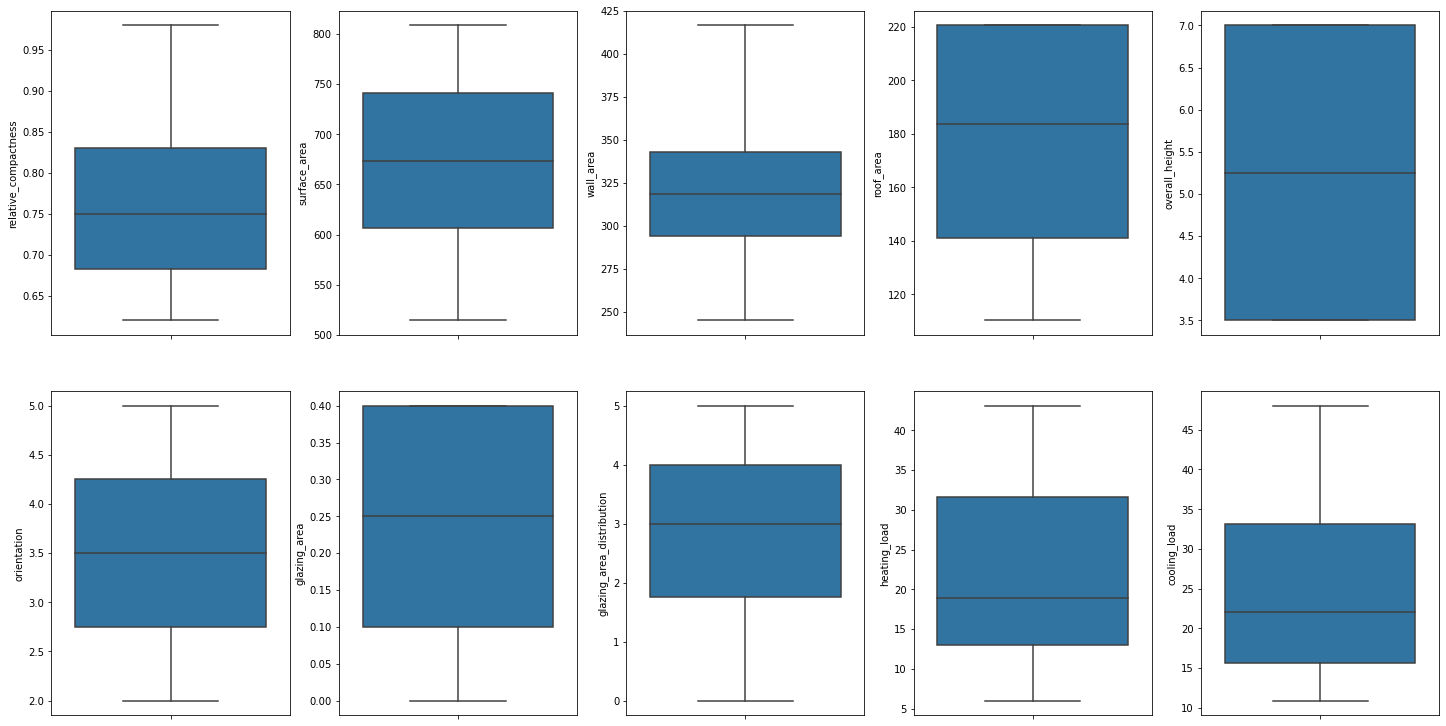

In [13]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df_class.items():
    sns.boxplot(y=k, data=df_class, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [14]:
df_class.nunique()

relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 586
cooling_load                 636
dtype: int64

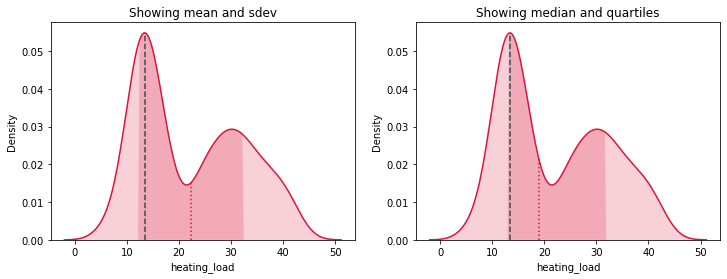

In [15]:
x = df_class.heating_load
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='crimson', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        mode_idx = np.argmax(ys)
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and sdev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')
    ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='darkslategray', ls='--')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    ax.fill_between(xs,
                    0,
                    ys,
                    where=(left <= xs) & (xs <= right),
                    interpolate=True,
                    facecolor='crimson',
                    alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

# correlation

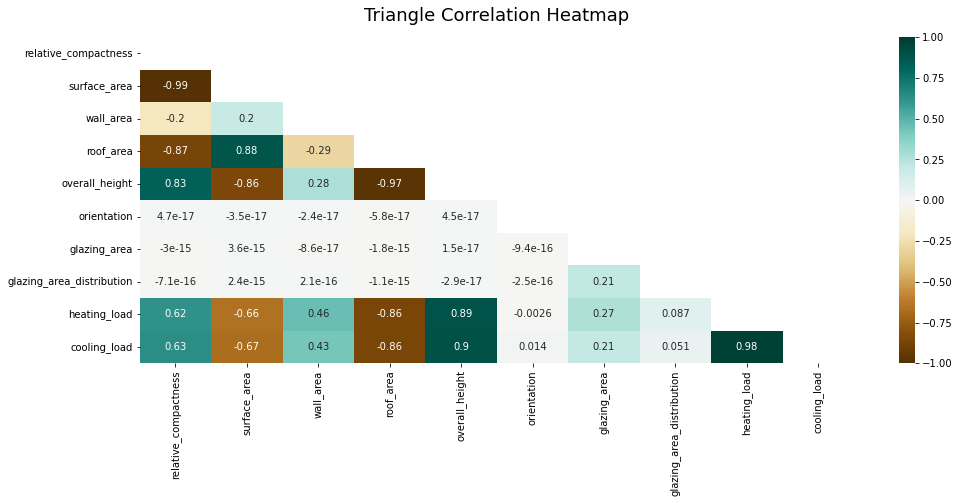

In [16]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_class.corr(), dtype=bool))
heatmap = sns.heatmap(df_class.corr(),
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize': 18},
                  pad=16)
plt.show()


# Feature importance and selection

Text(0.5, 1.0, 'Correlation between features and target variable')

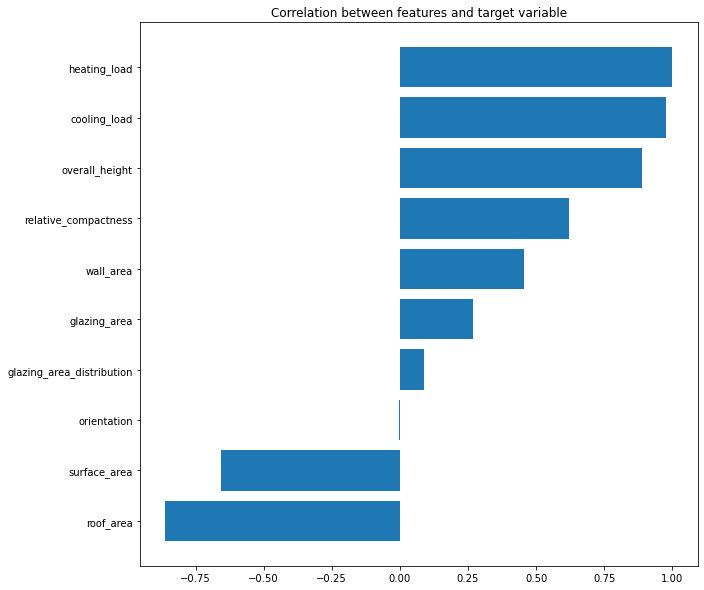

In [17]:
# We considered the correlation between numerical features and target variable

corr_df = pd.DataFrame(df_class.corrwith(df_class["heating_load"]),
                       columns=["Corr"])

corr_df = corr_df.sort_values(by=['Corr'])

# Set figure and axes
fig, ax = plt.subplots()

# Figure size
fig.set_size_inches(10, 10)

plt.barh(y=corr_df.index, width=corr_df.Corr)

# Add title
plt.title('Correlation between features and target variable')

In [18]:
df_class['total_load'] = df_class['heating_load'] + df_class['cooling_load']

# roof area vs load

In [19]:
df_class.roof_area.value_counts()[:3].sort_values(ascending=False)

220.50    384
147.00    192
122.50    128
110.25     64
Name: roof_area, dtype: int64

In [20]:
df_class.roof_area.describe()

count    768.000000
mean     176.604167
std       45.165950
min      110.250000
25%      140.875000
50%      183.750000
75%      220.500000
max      220.500000
Name: roof_area, dtype: float64

<AxesSubplot:xlabel='roof_area', ylabel='Probability'>

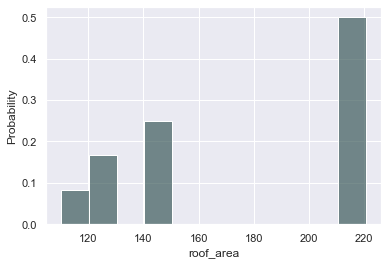

In [21]:
sns.set_theme(style='darkgrid')
sns.histplot(df_class.roof_area,
             stat="probability",
             color="darkslategray",
             alpha=0.65)

<AxesSubplot:xlabel='roof_area', ylabel='total_load'>

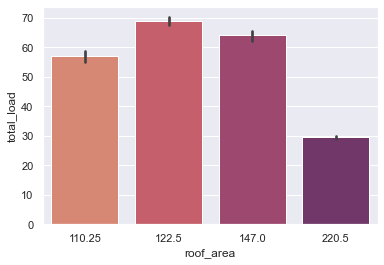

In [22]:
sns.barplot(x='roof_area', y='total_load', data=df_class, palette='flare')

<AxesSubplot:xlabel='roof_area', ylabel='total_load'>

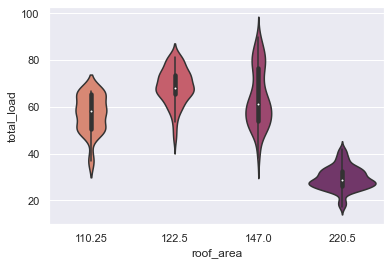

In [23]:
sns.violinplot(x='roof_area', y='total_load', data=df_class, palette='flare')


We have 4 kinds of roof areas, where 50% of the buildings have roof area of 220.5, 25% have 147 while the rest 25% of the buildings have roof area below 140. Interestingly, as we saw above on the correlation matrix, those with roof area of 220.5 have lower heating and cooling load, thus tend to be more energy efficient.

# Overall height vs load

<AxesSubplot:xlabel='overall_height', ylabel='total_load'>

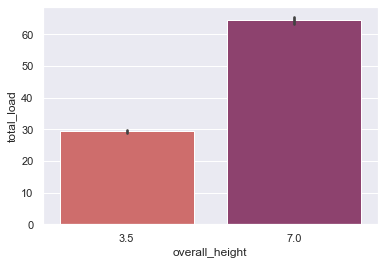

In [24]:
sns.barplot(x='overall_height', y='total_load', data=df_class, palette='flare')

Higher buildings tend to be much more energy-intensive.

# Wall area vs load

<AxesSubplot:xlabel='wall_area', ylabel='total_load'>

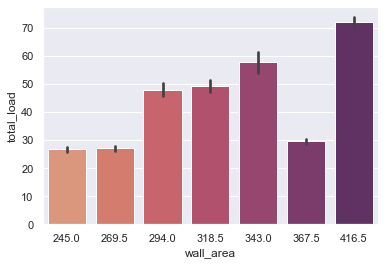

In [25]:
sns.barplot(x='wall_area', y='total_load', data=df_class, palette='flare')

Higher load is expected to buildings with high wall area.

# Relative Compactness vs load

<AxesSubplot:xlabel='relative_compactness', ylabel='total_load'>

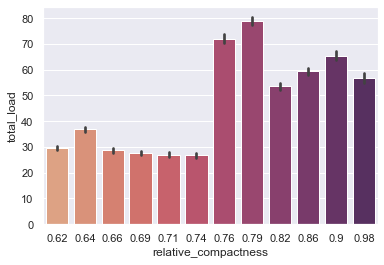

In [26]:
sns.barplot(x='relative_compactness',
            y='total_load',
            data=df_class,
            palette='flare')


We observe that when relative compactness is below 0.75 the heating and cooling load are low, but high when is above 0.75. This means that a less compact building is more energy efficient.

# Training & splitting

In [27]:
df_class = df_class.drop('total_load', axis=1)
df_class.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [28]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_class,
                                          test_size=0.2,
                                          random_state=1)
df_train, df_val = train_test_split(df_full_train,
                                    test_size=0.25,
                                    random_state=None)

print(len(df_class)), print(len(df_full_train)), print(len(df_train)), print(
    len(df_val)), print(len(df_test))
print(len(df_train) * 100 / len(df_class)), print(
    len(df_val) * 100 / len(df_class)), print(
        len(df_test) * 100 / len(df_class))

768
614
460
154
154
59.895833333333336
20.052083333333332
20.052083333333332


(None, None, None)

In [29]:
df_train.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
55,0.90,563.5,318.5,122.5,7.0,5,0.1,1,28.09,34.33
58,0.86,588.0,294.0,147.0,7.0,4,0.1,1,26.37,27.03
204,0.82,612.5,318.5,147.0,7.0,2,0.1,4,23.80,24.61
284,0.62,808.5,367.5,220.5,3.5,2,0.1,5,12.59,14.24
14,0.82,612.5,318.5,147.0,7.0,4,0.0,0,16.95,21.16


In [30]:
y_train = df_train[['heating_load', 'cooling_load']].values
y_val = df_val[['heating_load', 'cooling_load']].values
y_test = df_test[['heating_load', 'cooling_load']].values
y_test[:, 0]

array([12.74, 29.68, 36.57, 38.57, 34.72, 16.99, 15.19, 28.56, 14.51,
       25.27, 14.96, 33.27, 24.96, 15.09, 12.95, 38.98, 28.75, 15.3 ,
       13.95, 32.4 , 25.17, 10.07, 23.87, 18.46, 14.61, 34.24, 16.76,
       13.  , 41.26, 12.76, 32.71, 37.24, 11.33, 14.28, 26.33, 41.73,
       17.69, 11.69, 39.83, 14.5 , 36.43, 11.34,  8.5 , 15.36, 11.18,
       15.42, 19.5 , 25.17, 36.57, 39.04, 11.13, 32.4 , 10.7 , 15.08,
       28.64, 29.67, 35.96, 28.66, 12.43, 15.23, 12.8 , 23.53, 22.79,
       28.01, 28.52, 39.31, 25.98, 14.92, 32.67, 12.93, 26.28, 15.16,
       14.44, 32.38, 14.37, 23.93, 29.43, 32.12, 14.6 , 24.32, 11.68,
       29.08, 14.51, 29.91, 14.39, 39.97, 40.4 , 36.86, 13.91, 12.78,
       28.4 , 24.63, 11.6 , 34.29, 14.62, 31.69, 11.43, 25.38, 10.42,
       29.5 , 32.46, 14.71, 24.24, 12.02, 13.86, 12.28, 24.03, 28.07,
       23.86, 36.95, 38.89, 15.55, 25.37, 11.69, 36.06, 10.78, 37.12,
       32.21, 32.09, 14.21, 26.48, 28.6 , 14.7 , 26.91, 39.04, 14.62,
       10.37, 29.47,

In [31]:
del df_train['heating_load']
del df_train['cooling_load']
del df_val['heating_load']
del df_val['cooling_load']
del df_test['heating_load']
del df_test['cooling_load']

In [32]:
df_train.head()


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
55,0.90,563.5,318.5,122.5,7.0,5,0.1,1
58,0.86,588.0,294.0,147.0,7.0,4,0.1,1
204,0.82,612.5,318.5,147.0,7.0,2,0.1,4
284,0.62,808.5,367.5,220.5,3.5,2,0.1,5
14,0.82,612.5,318.5,147.0,7.0,4,0.0,0


In [34]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
#@ IMPLEMENTATION OF DICTVECTORIZER:
numerical = [
    'relative_compactness', 'surface_area', 'wall_area', 'roof_area',
    'overall_height', 'orientation', 'glazing_area',
    'glazing_area_distribution'
]

train_dict = df_train[numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Models

# Linear Regression|

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [41]:
y_pred = model.predict(X_val)

r2_score_val = r2_score(y_val, y_pred)
print(f'r2 score validation : {r2_score_val:.4f}')
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE validation : {rmse_val:.4f}')

r2 score validation : 0.8957
RMSE validation : 3.2497


# Ridge

In [42]:
alpha_values = [0, 0.01, 0.1, 0.5, 1, 10]

In [43]:
for alpha in alpha_values:
    RG = Ridge(alpha=alpha, random_state=None)
    ridge = RG.fit(X_train, y_train)

    y_pred = ridge.predict(X_val)

    r2_score_val = r2_score(y_val, y_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
    print(
        f"alpha : {alpha} - RMSE: {rmse_val:.5f}, r2 score: {r2_score_val:.5f}")

<IPython.core.display.Javascript object>

alpha : 0 - RMSE: 3.24901, r2 score: 0.89571


<IPython.core.display.Javascript object>

alpha : 0.01 - RMSE: 3.25586, r2 score: 0.89525


<IPython.core.display.Javascript object>

alpha : 0.1 - RMSE: 3.29889, r2 score: 0.89244


<IPython.core.display.Javascript object>

alpha : 0.5 - RMSE: 3.33624, r2 score: 0.88999


<IPython.core.display.Javascript object>

alpha : 1 - RMSE: 3.35336, r2 score: 0.88887


<IPython.core.display.Javascript object>

alpha : 10 - RMSE: 3.66813, r2 score: 0.86741


We select alpha=0.01 as the best model

1. The regularization strength is determined by alpha in this case.
2. If it is zero, it behaves similarly to LinearRegression.
3. Smoothness improves as alpha increases (reduces complexity by decreasing variance)
4. A decrease in alpha raises the magnitude of the coefficients (increases complexity by decreasing bias)

# Decision Trees

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [47]:
y_pred = dt.predict(X_val)

r2_score_val = r2_score(y_val, y_pred)
print(f'r2 score validation : {r2_score_val:.4f}')
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE validation : {rmse_val:.4f}')

r2 score validation : 0.8023
RMSE validation : 4.4925


# Tuning hyperparameters

We can see the scores are not that good. Let's try to check the parameters.

In [48]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))

In [49]:
scores_val = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
        scores_val.append((depth, s, rmse_val))

In [50]:
columns = ['max_depth', 'min_samples_leaf', 'rmse_val']
df_scores = pd.DataFrame(scores_val, columns=columns)

df_scores_pivot_val = df_scores.pivot(index='min_samples_leaf',
                                      columns=['max_depth'],
                                      values=['rmse_val'])
df_scores_pivot_val.round(3)

rmse_val                
max_depth               4       5       6
min_samples_leaf                         
1                   2.128   1.738   1.521
5                   2.103   1.831   1.561
10                  2.103   1.992   1.775
15                  2.331   2.254   2.155
20                  2.261   2.179   2.179
100                 4.007   4.007   4.007
200                 4.492   4.492   4.492
500                10.230  10.230  10.230

In [51]:
scores_val = []

for sample in [2, 3, 4, 5, 6]:
    for s in [1, 5, 10, 15]:
        dt = DecisionTreeRegressor(max_depth=6,
                                   min_samples_leaf=s,
                                   min_samples_split=sample)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
        scores_val.append((sample, s, rmse_val))

In [52]:
columns = ['min_samples_split', 'min_samples_leaf', 'rmse_val']
df_scores = pd.DataFrame(scores_val, columns=columns)

df_scores_pivot_val = df_scores.pivot(index='min_samples_leaf',
                                      columns=['min_samples_split'],
                                      values=['rmse_val'])
df_scores_pivot_val.round(3)

rmse_val                            
min_samples_split        2      3      4      5      6
min_samples_leaf                                      
1                    1.521  1.521  1.521  1.527  1.527
5                    1.561  1.561  1.561  1.561  1.561
10                   1.775  1.775  1.775  1.775  1.775
15                   2.155  2.155  2.155  2.155  2.155

<AxesSubplot:xlabel='None-min_samples_split', ylabel='min_samples_leaf'>

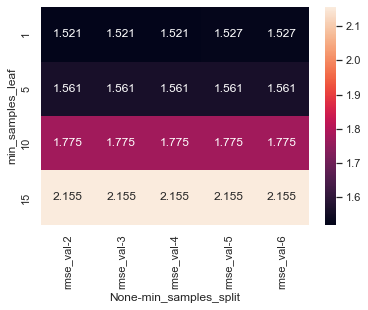

In [53]:
sns.heatmap(df_scores_pivot_val, annot=True, fmt=".3f")


We select the best model with max_depth=6,min_samples_leaf=5,min_samples_split=4

In [54]:
dt = DecisionTreeRegressor(max_depth=6,
                           min_samples_leaf=5,
                           min_samples_split=4,
                           random_state=None)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

r2_score_val = r2_score(y_val, y_pred)
print(f'r2 score validation : {r2_score_val:.4f}')
adj_r2_score_val = 1 - (1 - r2_score(y_val, y_pred)) * (len(y_val) - 1) / (
    len(y_val) - X_val.shape[1] - 1)
print(f'adjusted r2 score validation : {adj_r2_score_val:.4f}')
mae_val = metrics.mean_absolute_error(y_val, y_pred)
print(f'MAE validation : {mae_val:.4f}')
mse_val = mean_squared_error(y_val, y_pred)
print(f'MSE validation : {mse_val:.4f}')
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE validation : {rmse_val:.4f}')

r2 score validation : 0.9751
adjusted r2 score validation : 0.9738


<IPython.core.display.Javascript object>

MAE validation : 0.9345
MSE validation : 2.4352
RMSE validation : 1.5605


# Random forest

In [55]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE validation : {rmse_val:.4f}')

<IPython.core.display.Javascript object>

RMSE validation : 1.6471


# Tuning hyperparameters

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

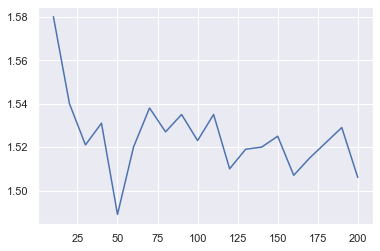

In [56]:
from tqdm.auto import tqdm

scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=None, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))

    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

Seems RMSE stops improving after 50 n_estimators.

What about the best max_depth ?

1. Try different values of max_depth: [20, 50, 100]
2. For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
3. Fix the random seed: random_state=1=SEED

In [57]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=None,
                               n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

  0%|          | 0/20 [00:00<?, ?it/s]

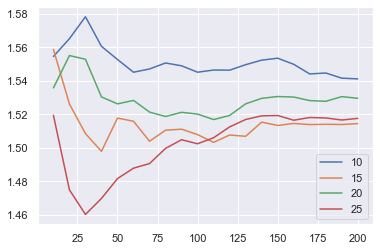

In [58]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()

In [59]:
rf_scores_val = []

for sample in [2, 3, 4, 5, 6]:
    for s in [1, 5, 10, 15]:
        rf = RandomForestRegressor(n_estimators=50,
                                   criterion="mse",
                                   max_depth=25,
                                   min_samples_split=sample,
                                   min_samples_leaf=s,
                                   random_state=None,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
        rf_scores_val.append((sample, s, rmse_val))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
columns = ['min_samples_split', 'min_samples_leaf', 'rmse_val']
df_rf_scores = pd.DataFrame(rf_scores_val, columns=columns)

df_rf_scores_pivot_val = df_rf_scores.pivot(index='min_samples_leaf',
                                            columns=['min_samples_split'],
                                            values=['rmse_val'])
df_rf_scores_pivot_val.round(3)

rmse_val                            
min_samples_split        2      3      4      5      6
min_samples_leaf                                      
1                    1.563  1.551  1.512  1.504  1.477
5                    1.530  1.515  1.543  1.537  1.525
10                   1.947  1.919  1.936  1.970  1.949
15                   2.131  2.157  2.169  2.142  2.126

The function criterion() is used to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error. Scores are evaluated based on the mean squared error between your prediction and the actual values, so we use criterion="mse".



In [61]:
#@ TRAINING RANDOM FOREST MODEL:
rf = RandomForestRegressor(n_estimators=50,
                           criterion="mse",
                           max_depth=25,
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_jobs=-1,
                           random_state=None)

rf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(criterion='mse', max_depth=25, n_estimators=50, n_jobs=-1)

In [62]:
y_pred = rf.predict(X_val)

r2_score_val = r2_score(y_val, y_pred)
print(f'r2 score validation : {r2_score_val:.4f}')
adj_r2_score_val = 1 - (1 - r2_score(y_val, y_pred)) * (len(y_val) - 1) / (
    len(y_val) - X_val.shape[1] - 1)
print(f'adjusted r2 score validation : {adj_r2_score_val:.4f}')
mae_val = metrics.mean_absolute_error(y_val, y_pred)
print(f'MAE validation : {mae_val:.4f}')
mse_val = mean_squared_error(y_val, y_pred)
print(f'MSE validation : {mse_val:.4f}')
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE validation : {rmse_val:.4f}')

r2 score validation : 0.9759
adjusted r2 score validation : 0.9746


<IPython.core.display.Javascript object>

MAE validation : 0.7976
MSE validation : 2.3415
RMSE validation : 1.5302


We managed to get a better RMSE from the base model.

One could also experiment with

bootstrap ,max_features

# Feature importance

We'll find the most important feature with these parametes:
1. n_estimators=50,
2. max_depth=25,
3. random_state=1,
4. min_samples_leaf=1,
5. min_samples_split=2,
6. n_jobs=-1 (optional)

In [63]:
rf.feature_importances_

array([0.06739494, 0.01709879, 0.0048953 , 0.14322034, 0.64422881,
       0.00164302, 0.08041089, 0.04110791])

In [64]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
4,relative_compactness,0.644229
3,overall_height,0.143220
6,surface_area,0.080411
0,glazing_area,0.067395
7,wall_area,0.041108


So relative_compactness and overall_height seem important for this model.

# Xgboost

In [65]:
import xgboost as xgb

In [66]:
#@ CREATING THE DMARTIX:
features = dv.feature_names_
# features = dv.get_feature_names()

regex = re.compile(r"<", re.IGNORECASE)
features = [
    regex.sub("_", col) if any(x in str(col)
                               for x in set(('[', ']', '<'))) else col
    for col in features
]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

Tuning the following parameters:

1. eta
2. max_depth
3. min_child_weight

In [68]:
scores = []
for eta in [0.1, 0.3, 0.01]:
    xgb_params = {
        'eta': eta,
        'max_depth': 3,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    y_pred = model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_score_val = r2_score(y_val, y_pred)
    scores.append((eta, rmse))
    print(f"for eta={eta} rmse= {rmse}, r2 score validation : {r2_score_val}")

for eta=0.1 rmse= 1.2870620449733714, r2 score validation : 0.9830059841931298
for eta=0.3 rmse= 1.1309162281902845, r2 score validation : 0.9868961316530837
for eta=0.01 rmse= 9.99184183482002, r2 score validation : 0.016996321924374058


In [69]:
scores = []
for eta in [0.1, 0.3, 0.01]:
    xgb_params = {
        'min_child_weight': 2,
        'max_depth': 5,
        'eta': eta,
        'booster': 'gbtree',
        'base_score': 0.75,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200)
    y_pred = model.predict(dval)
    rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_score_val_xgb = r2_score(y_val, y_pred)
    scores.append((eta, rmse_xgb))
    print(f"for eta={eta} rmse= {rmse_xgb}, r2 score validation : {r2_score_val_xgb}")

for eta=0.1 rmse= 0.9330648460423903, r2 score validation : 0.9911183268468915
for eta=0.3 rmse= 0.8470871657592324, r2 score validation : 0.9927151641559491
for eta=0.01 rmse= 4.103634226137902, r2 score validation : 0.8336672139048964


We select eta = 0.3 with the lowest rmse.

In [70]:
ta = 0.3
xgb_params = {
    'min_child_weight': 2,
    'max_depth': 5,
    'eta': eta,
    'booster': 'gbtree',
    'base_score': 0.75,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)
y_pred = model.predict(dval)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred))
r2_score_val_xgb = r2_score(y_val, y_pred)
scores.append((eta, rmse_xgb))
print(f"for eta={eta} rmse= {rmse_xgb}, r2 score validation : {r2_score_val_xgb}")

for eta=0.01 rmse= 4.103634226137902, r2 score validation : 0.8336672139048964


In [71]:
models_name = [
    "Linear Regression", "Ridge Regression", "Decision Tree Regressor",
    "Random Forest Regressor"
]
models = [
    LinearRegression(),
    Ridge(alpha=0.01, random_state=None),
    DecisionTreeRegressor(max_depth=6,
                          min_samples_leaf=5,
                          min_samples_split=4,
                          random_state=None),
    RandomForestRegressor(n_estimators=50,
                          criterion="mse",
                          max_depth=25,
                          min_samples_leaf=1,
                          min_samples_split=2,
                          n_jobs=-1,
                          random_state=None)
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
results = []
for i in tqdm(range(len(models_name))):
    model = models[i].fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results.append((models_name[i], rmse))
results_df = pd.DataFrame(results, columns=["models", "rmse"])

  0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
xgb_result = {'models': "XGBoost Regressor", "rmse": rmse_xgb} 
results_df = results_df.append(xgb_result, ignore_index=True)
results_df.sort_values(by="rmse", inplace=True)
results_df

,models,rmse
3,Random Forest Regressor,1.499912
2,Decision Tree Regressor,1.560513
0,Linear Regression,3.249681
1,Ridge Regression,3.255861
4,XGBoost Regressor,4.103634


# Final model

We select for our final model the xgboost one and train for the full set.

In [74]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train[['heating_load', 'cooling_load']].values

In [75]:
del df_full_train['heating_load']
del df_full_train['cooling_load']

In [76]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [77]:
features = dv.feature_names_
dfulltrain = xgb.DMatrix(X_full_train,
                         label=y_full_train,
                         feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [78]:
eta = 0.3
xgb_params = {
    'min_child_weight': 2,
    'max_depth': 5,
    'eta': eta,
    'booster': 'gbtree',
    'base_score': 0.75,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)
y_pred = model.predict(dtest)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score_final = r2_score(y_test, y_pred)
print(f"for eta={eta} rmse= {rmse_final}, r2 score test : {r2_score_final}")

for eta=0.3 rmse= 0.5186408103267065, r2 score test : 0.9971609622030928
